In [1]:
import torch
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np 
outdir = r"C:\Document\Serieux\Travail\python_work\cEBNM_torch\more_recent_test\hierarchical_factor_model"
os.makedirs(outdir, exist_ok=True)
# Reproducibility
#torch.manual_seed(1)
N = 2000  
P= 200
# Scatter of x vs y 
torch.manual_seed(1)

# -------------------------
# 2) Generate f (3 x 200)
#    f[0,i] ~ t1_i * N(0,1), f[1,i], f[2,i] ~ t2_i * N(0,1)
# -------------------------

t0 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t1 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t2 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t11 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t12 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t21 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1
t22 = torch.randint(0, 2, (P,), dtype=torch.float32)  # 0/1

a0 = t0 * torch.randn(P)
b1 = t1 * torch.randn(P)
b2 = t2 * torch.randn(P)
detla11= t11 *torch.randn(P)

detla12= t11 *torch.randn(P)
detla21= t11 *torch.randn(P)
detla22= t11 *torch.randn(P)  
f_mat = torch.stack([a0,b1,b2, detla11, detla12,detla21, detla22 ], dim=0)
f_mat

tensor([[ 0.8993,  0.4417, -0.0000,  ...,  0.6032, -1.8230, -0.0000],
        [-0.0000, -0.0000,  0.0000,  ...,  0.0000, -0.5855,  1.6023],
        [-0.0000,  0.0000, -0.2332,  ...,  0.0000,  0.0000,  0.0000],
        ...,
        [-0.0000,  0.0000,  0.0000,  ...,  1.2064,  0.0000,  0.0781],
        [-0.0000,  0.0000, -0.0000,  ...,  0.0251, -0.0000, -0.7000],
        [-0.0000,  0.0000, -0.0000,  ...,  0.0824, -0.0000,  1.9809]])

In [2]:

N= 1000

L = torch.zeros(N, 7, dtype=torch.float32)


L[:,0]=1
L[0:500, 1]=1

L [500:,2]=1
L[0:250,3]=1
L[251:500,4]=1

L[501:750,5]=1

L[751:,6]=1

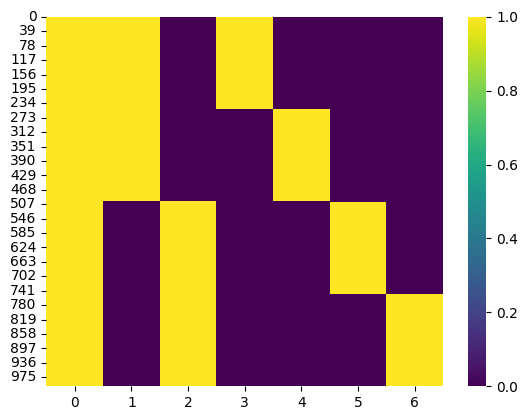

In [3]:


sns.heatmap(L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()


In [4]:
L.shape

torch.Size([1000, 7])

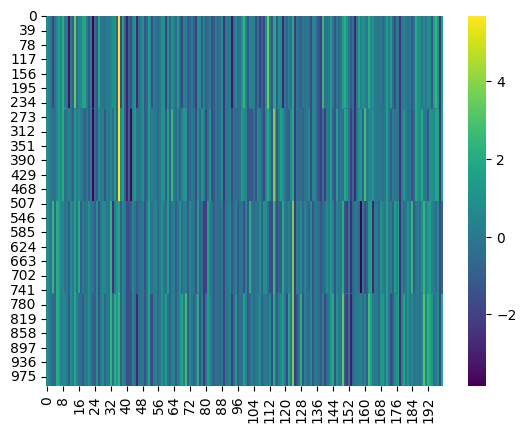

In [5]:
X_true= L@f_mat 
Z = L@f_mat + 0.5*torch.randn(N, P)  * 2.5  # (N, M)
Z_np = Z.detach().cpu().numpy()

# Save as tab-delimited text
np.savetxt(os.path.join(outdir, "Z_matrix.txt"), Z_np, fmt="%.6f", delimiter="\t")

X_true=    L@f_mat 
X_np = X_true.detach().cpu().numpy()

# Save as tab-delimited text
np.savetxt(os.path.join(outdir, "Z_matrix.txt"), Z_np, fmt="%.6f", delimiter="\t")
np.savetxt(os.path.join(outdir, "X_matrix.txt"), X_np, fmt="%.6f", delimiter="\t")
sns.heatmap(X_true , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

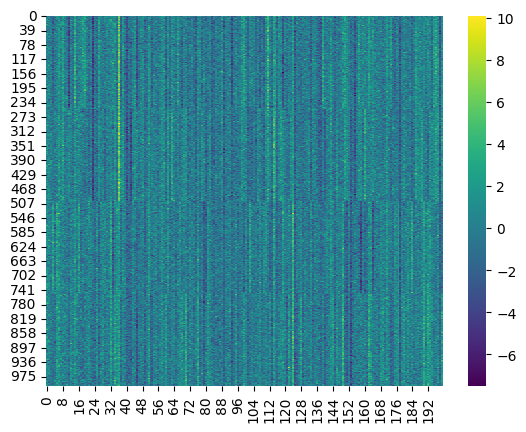

In [6]:
sns.heatmap(Z , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [7]:
from cebmf_torch import cEBMF

In [8]:
mycebmf0=  cEBMF(data=Z ,K=10 ) 
mycebmf0.initialise_factors()
mycebmf0.fit(50)

CEBMFResult(L=tensor([[-14.4463,  -9.6428,  -9.2036,  ...,   0.0000,   0.0000,   0.0000],
        [-14.2464,  -9.6894,  -5.8650,  ...,   0.0000,   0.0000,   0.0000],
        [-14.6211,  -9.1263, -10.1100,  ...,   0.0000,   0.0000,   0.0000],
        ...,
        [-12.8348,  10.1924,   0.3270,  ...,   0.0000,   0.0000,   0.0000],
        [-10.8234,  11.1370,  -0.0585,  ...,   0.0000,   0.0000,   0.0000],
        [-12.5203,  11.6924,  -0.3850,  ...,   0.0000,   0.0000,   0.0000]]), F=tensor([[-6.2869e-02,  2.2364e-02,  2.0014e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [-3.2738e-02,  6.5558e-04,  1.2770e-03,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 8.7235e-03, -1.0558e-02, -8.7405e-05,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        ...,
        [-8.9643e-02, -2.7805e-02,  2.0484e-02,  ...,  0.0000e+00,
          0.0000e+00,  0.0000e+00],
        [ 1.6061e-01,  9.8163e-04, -8.6126e-05,  ...,  0.0000e+00,
          0.0000e+00,

In [9]:
mycebmf01=  cEBMF(data=Z, 
                 prior_L="gbinary", K=10,
                  allow_backfitting=False ) 
mycebmf01.initialise_factors()
 
mycebmf01.L= mycebmf0.L

mycebmf01.F= mycebmf0.F
mycebmf01.fit(50)

CEBMFResult(L=tensor([[1.2988e-23, 7.7501e+00, 5.7678e+00,  ..., 1.1753e+00, 1.1064e+00,
         1.2988e-23],
        [1.2988e-23, 6.4350e+00, 5.6555e+00,  ..., 1.3927e+00, 1.0456e+00,
         1.2988e-23],
        [1.2988e-23, 8.1170e+00, 5.5128e+00,  ..., 1.1713e+00, 1.2466e+00,
         1.2988e-23],
        ...,
        [1.2988e-23, 8.9695e+00, 1.3122e-04,  ..., 1.3105e+00, 1.2038e+00,
         1.2988e-23],
        [1.2988e-23, 8.3431e+00, 2.7524e-06,  ..., 1.2581e+00, 1.1998e+00,
         1.2988e-23],
        [1.2988e-23, 9.1427e+00, 9.2046e-06,  ..., 1.3696e+00, 1.1674e+00,
         1.2988e-23]]), F=tensor([[ 4.0125e-15,  1.1216e-01,  1.4557e-01,  ...,  3.1978e-05,
          6.9338e-06,  3.9884e-15],
        [ 3.3629e-15,  4.7239e-02,  8.6554e-02,  ...,  4.1091e-05,
          5.2029e-06,  3.3568e-15],
        [-2.8173e-15, -2.4514e-02,  5.4704e-05,  ..., -3.3591e-05,
         -8.1321e-06, -2.8219e-15],
        ...,
        [ 5.3094e-15,  8.4203e-02,  2.8638e-01,  ...,  6.7660e-05

In [10]:
 
mycebmf2=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="cgb_sharp", K=10,
                  allow_backfitting=False ) 
mycebmf2.initialise_factors()
mycebmf2.L= mycebmf0.L

mycebmf2.F= mycebmf0.F
mycebmf2.fit(50)

[CGB] Epoch   1/50 | Loss=64.013845 | mu=0.9950 | sigma=0.0199 | mean π0=0.5552
[CGB] Epoch  10/50 | Loss=63.337545 | mu=0.9699 | sigma=0.0194 | mean π0=0.9949
[CGB] Epoch  20/50 | Loss=63.331740 | mu=0.9678 | sigma=0.0194 | mean π0=0.9990
[CGB] Epoch  30/50 | Loss=63.331349 | mu=0.9676 | sigma=0.0194 | mean π0=0.9994
[CGB] Epoch  40/50 | Loss=63.331154 | mu=0.9675 | sigma=0.0193 | mean π0=0.9996
[CGB] Epoch  50/50 | Loss=63.331036 | mu=0.9674 | sigma=0.0193 | mean π0=0.9997
[CGB] Epoch   1/50 | Loss=24.925723 | mu=1.0051 | sigma=0.0201 | mean π0=0.4976
[CGB] Epoch  10/50 | Loss=24.434491 | mu=1.0514 | sigma=0.0210 | mean π0=0.5027
[CGB] Epoch  20/50 | Loss=23.972019 | mu=1.1048 | sigma=0.0221 | mean π0=0.4996
[CGB] Epoch  30/50 | Loss=23.788389 | mu=1.1602 | sigma=0.0232 | mean π0=0.5000
[CGB] Epoch  40/50 | Loss=23.614942 | mu=1.2175 | sigma=0.0244 | mean π0=0.4999
[CGB] Epoch  50/50 | Loss=23.439811 | mu=1.2767 | sigma=0.0255 | mean π0=0.5000
[CGB] Epoch   1/50 | Loss=8.911091 | mu=

CEBMFResult(L=tensor([[0.0000e+00, 1.6103e-18, 1.0768e+00,  ..., 1.2745e-05, 9.4544e-01,
         2.0473e-06],
        [0.0000e+00, 6.0358e-19, 1.0759e+00,  ..., 1.0407e+00, 7.2872e-05,
         2.6869e-06],
        [0.0000e+00, 3.6108e-18, 1.0763e+00,  ..., 3.4873e-06, 9.7529e-01,
         7.8896e-06],
        ...,
        [0.0000e+00, 8.9401e-01, 1.0812e+00,  ..., 5.8016e-06, 9.5113e-05,
         2.4415e-04],
        [0.0000e+00, 8.9373e-01, 1.0737e+00,  ..., 7.0980e-07, 5.6261e-07,
         5.9420e-06],
        [0.0000e+00, 8.9670e-01, 1.0760e+00,  ..., 8.0016e-08, 1.7674e-05,
         2.6734e-06]]), F=tensor([[ 0.0000e+00,  5.9817e-01,  3.6898e-01,  ..., -2.0652e-02,
          5.3069e-04,  2.3528e-02],
        [ 0.0000e+00,  7.3613e-03,  2.5820e-01,  ..., -1.7127e-01,
         -2.7089e-03,  8.8343e-03],
        [ 0.0000e+00, -2.4509e-01, -6.3589e-03,  ...,  2.3645e-03,
         -2.2537e-04,  3.2286e-02],
        ...,
        [ 0.0000e+00,  6.2639e-02,  5.5219e-01,  ...,  3.3225e-01

In [11]:
k=0
#mycebmf2._update_factors(k)

In [12]:
 
mycebmf1=  cEBMF(data=Z,self_row_cov=True,
                 prior_L="cgb", K=10,
                  allow_backfitting=False ) 
mycebmf1.initialise_factors()
 
 
mycebmf1.L= mycebmf0.L

mycebmf1.F= mycebmf0.F
mycebmf1.fit(50)

[CGB] Epoch 10/50, Loss=5.4601, mu2=-0.080, sigma2=13.149
[CGB] Epoch 20/50, Loss=5.4544, mu2=-0.160, sigma2=13.213
[CGB] Epoch 30/50, Loss=5.4487, mu2=-0.241, sigma2=13.289
[CGB] Epoch 40/50, Loss=5.4421, mu2=-0.322, sigma2=12.899
[CGB] Epoch 50/50, Loss=5.4364, mu2=-0.402, sigma2=13.088
[CGB] Epoch 10/50, Loss=5.0343, mu2=0.068, sigma2=8.629
[CGB] Epoch 20/50, Loss=5.0329, mu2=0.134, sigma2=8.561
[CGB] Epoch 30/50, Loss=5.0326, mu2=0.197, sigma2=8.752
[CGB] Epoch 40/50, Loss=5.0315, mu2=0.255, sigma2=8.748
[CGB] Epoch 50/50, Loss=5.0307, mu2=0.314, sigma2=8.651
[CGB] Epoch 10/50, Loss=3.8985, mu2=-0.005, sigma2=5.643
[CGB] Epoch 20/50, Loss=3.8718, mu2=-0.016, sigma2=6.331
[CGB] Epoch 30/50, Loss=3.8642, mu2=-0.028, sigma2=5.788
[CGB] Epoch 40/50, Loss=3.8633, mu2=-0.039, sigma2=5.932
[CGB] Epoch 50/50, Loss=3.8571, mu2=-0.046, sigma2=6.154
[CGB] Epoch 10/50, Loss=3.7956, mu2=0.053, sigma2=5.501
[CGB] Epoch 20/50, Loss=3.7601, mu2=0.104, sigma2=5.754
[CGB] Epoch 30/50, Loss=3.7550, m

CEBMFResult(L=tensor([[-1.4003e+01, -7.6177e+00, -7.6045e+00,  ..., -2.7641e-11,
          1.3508e-11, -1.0429e-11],
        [-1.3932e+01, -7.7383e+00, -4.8826e+00,  ..., -4.1948e-11,
          2.8968e-11, -5.1137e-12],
        [-1.4300e+01, -7.2732e+00, -8.3452e+00,  ..., -9.6146e-12,
          8.1607e-12, -7.5532e-12],
        ...,
        [-1.2279e+01,  8.6597e+00,  0.0000e+00,  ..., -2.0818e-12,
          4.1801e-12, -2.5304e-11],
        [-1.0320e+01,  9.4131e+00, -1.3874e-06,  ..., -6.8350e-12,
          6.3639e-12, -2.9770e-12],
        [-1.1969e+01,  9.8771e+00, -3.0020e-05,  ..., -2.3393e-11,
          5.9251e-11, -6.9716e-15]]), F=tensor([[-6.4224e-02,  2.8086e-02,  2.3969e-02,  ...,  3.2342e-07,
         -2.7559e-08, -1.8133e-08],
        [-3.3630e-02,  1.0283e-03,  1.4879e-03,  ..., -6.7341e-08,
         -2.3448e-08, -1.8718e-07],
        [ 8.6944e-03, -1.2900e-02, -1.6043e-04,  ...,  3.3703e-08,
         -3.4274e-08,  4.5081e-08],
        ...,
        [-9.2640e-02, -3.1828

In [13]:
mycebmf1.F

tensor([[-6.4224e-02,  2.8086e-02,  2.3969e-02,  ...,  3.2342e-07,
         -2.7559e-08, -1.8133e-08],
        [-3.3630e-02,  1.0283e-03,  1.4879e-03,  ..., -6.7341e-08,
         -2.3448e-08, -1.8718e-07],
        [ 8.6944e-03, -1.2900e-02, -1.6043e-04,  ...,  3.3703e-08,
         -3.4274e-08,  4.5081e-08],
        ...,
        [-9.2640e-02, -3.1828e-02,  2.3223e-02,  ..., -3.1479e-07,
         -1.8855e-07,  1.6944e-08],
        [ 1.6495e-01,  1.8859e-04,  4.1537e-06,  ...,  7.1946e-07,
         -1.7998e-07, -1.8770e-08],
        [-8.2280e-02, -4.7214e-02,  3.5146e-02,  ..., -6.5118e-07,
          1.3697e-07, -1.5558e-07]])

(array([ 34., 147.,  63.,   5., 502.,   0.,  21., 122.,  94.,  12.]),
 array([-9.91408634, -7.9058094 , -5.89753246, -3.88925552, -1.88097858,
         0.12729836,  2.13557529,  4.14385223,  6.15212917,  8.16040611,
        10.16868305]),
 <BarContainer object of 10 artists>)

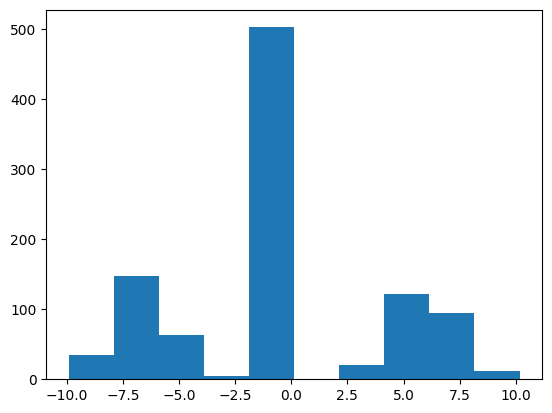

In [14]:
plt.hist(mycebmf1.L[:,3 ])


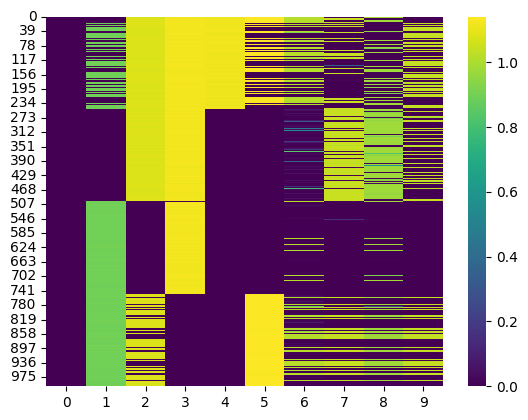

In [15]:
sns.heatmap(mycebmf2.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

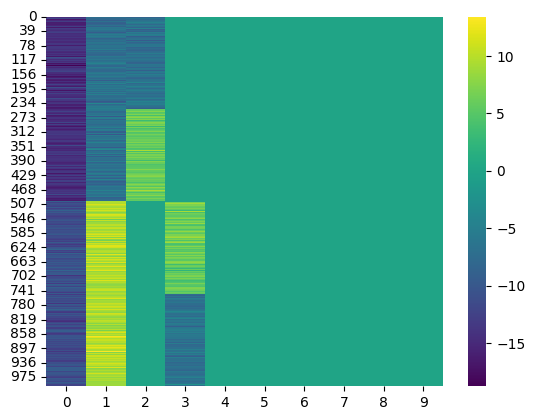

In [16]:
 
sns.heatmap(mycebmf1.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

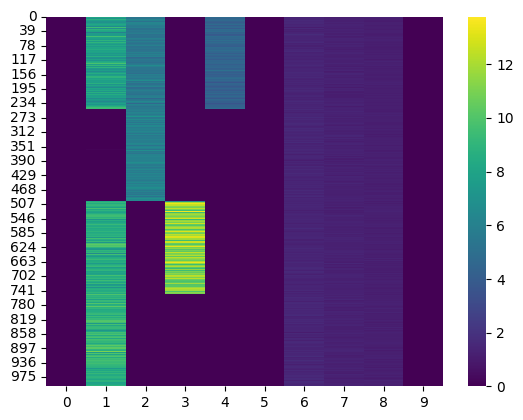

In [17]:
sns.heatmap(mycebmf01.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

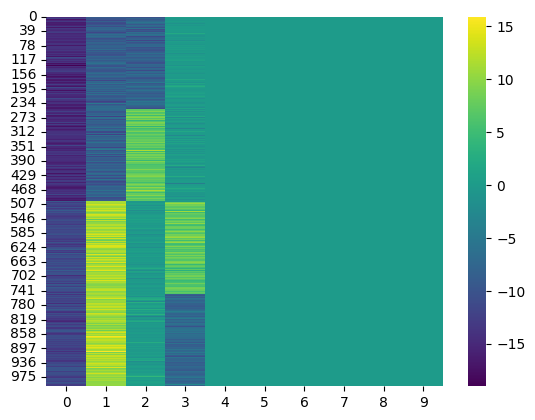

In [18]:
sns.heatmap(mycebmf0.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()

In [19]:
mycebmf1.L[:,4]

tensor([-2.4765e-11, -5.9924e-11, -5.3326e-11, -2.7740e-11, -1.8231e-13,
        -4.9289e-11, -2.0968e-12, -2.2485e-12, -5.7428e-12, -5.0440e-12,
        -2.4583e-11, -5.3209e-11, -2.2185e-10, -8.2555e-11, -3.3608e-11,
        -1.5983e-11, -2.5008e-11, -4.1239e-11, -9.4506e-12, -6.4906e-11,
        -1.8567e-11, -4.3755e-12, -1.7713e-10, -3.4247e-11, -2.7438e-11,
        -4.2538e-13, -6.0837e-11, -5.4395e-11, -7.6609e-11, -3.4943e-12,
        -2.4340e-11, -2.7684e-11, -5.4701e-13, -1.6166e-11, -2.8655e-11,
        -2.4706e-11, -9.0308e-11, -3.2421e-11, -3.6220e-11, -1.1943e-11,
        -4.0595e-11, -5.2841e-11, -1.0926e-10, -7.1044e-11, -1.2750e-10,
        -3.3853e-11, -1.0960e-10, -3.4976e-11, -8.1342e-11, -3.8620e-11,
        -5.9714e-11, -9.0163e-11, -7.9488e-11, -3.2151e-11, -3.6615e-11,
        -2.4004e-11, -4.4636e-11, -1.2824e-11, -6.4237e-11, -1.9723e-11,
        -2.8046e-11, -3.3793e-11, -3.1357e-11, -9.8757e-12, -1.4342e-11,
        -3.9806e-11, -4.1023e-11, -2.6984e-11, -1.5

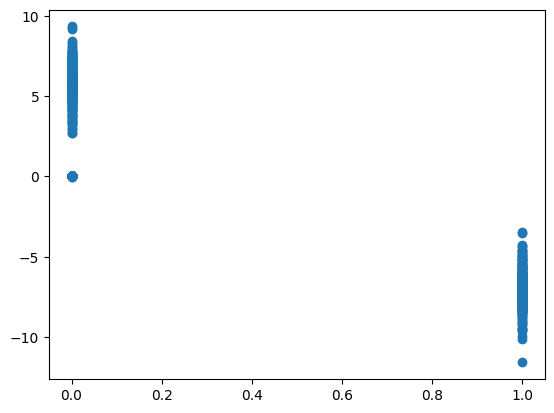

In [20]:
plt.scatter(L[:,3],mycebmf1.L[:,2])

(array([  1.,   4.,   3.,   3.,  10.,  17.,  30.,  98., 215., 619.]),
 array([-3.12598891e-10, -2.81339008e-10, -2.50079124e-10, -2.18819227e-10,
        -1.87559329e-10, -1.56299446e-10, -1.25039562e-10, -9.37796646e-11,
        -6.25197810e-11, -3.12598905e-11,  0.00000000e+00]),
 <BarContainer object of 10 artists>)

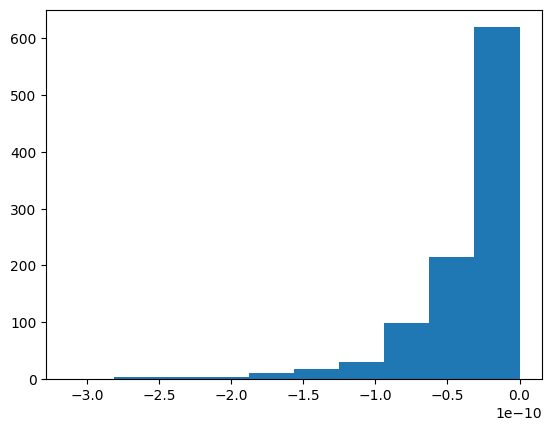

In [21]:
plt.hist(mycebmf1.L[:,4 ])

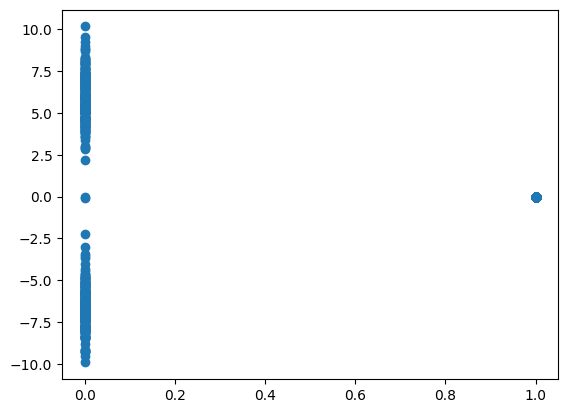

In [22]:
plt.scatter(L[:,1],mycebmf1.L[:,3])

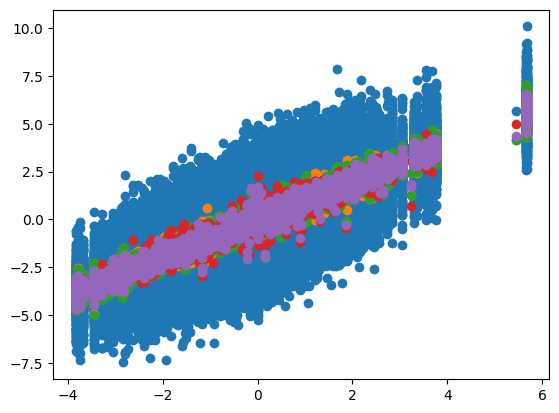

In [23]:
plt.scatter(L@f_mat,Z)
plt.scatter(L@f_mat,mycebmf0.L@mycebmf0.F.T )
plt.scatter(L@f_mat,mycebmf1.L@mycebmf1.F.T )

plt.scatter(L@f_mat,mycebmf2.L@ mycebmf2.F.T )

plt.scatter(L@f_mat,mycebmf01.L@mycebmf01.F.T )

In [24]:
print(torch.mean((L@f_mat - mycebmf0.L@ mycebmf0.F.T )**2))
print(torch.mean((L@f_mat - mycebmf01.L@ mycebmf01.F.T )**2))
print(torch.mean((L@f_mat - mycebmf1.L@ mycebmf1.F.T )**2))
print(torch.mean((L@f_mat - mycebmf2.L@ mycebmf2.F.T )**2)) 

tensor(0.0339)
tensor(0.0170)
tensor(0.0305)
tensor(0.0232)


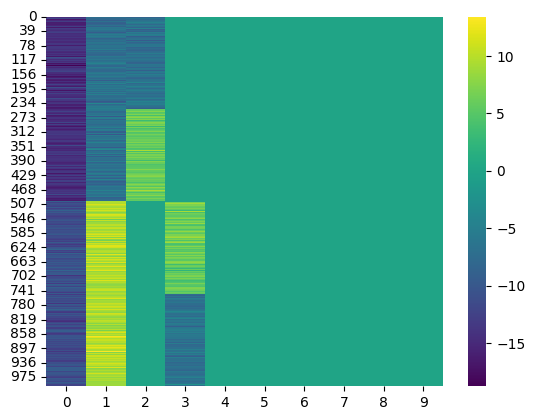

In [25]:
sns.heatmap(mycebmf1.L , cmap="viridis", annot=False)  # set annot=True for numbers
plt.show()